<a href="https://colab.research.google.com/github/tejvirus0003/mypynb/blob/main/random_forest_part_2%20(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv('/content/drive/MyDrive/removed_na_loan.csv')

In [4]:
data.head()

,Unnamed: 0,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies
0,0,3600.0,36,13.99,123.03,C,C4,10+ years,MORTGAGE,55000.0,Not Verified,Fully Paid,5.91,7.0,0.0,2765.0,29.7,13.0,w,Individual,1.0,0.0
1,1,24700.0,36,11.99,820.28,C,C1,10+ years,MORTGAGE,65000.0,Not Verified,Fully Paid,16.06,22.0,0.0,21470.0,19.2,38.0,w,Individual,4.0,0.0
2,3,35000.0,60,14.85,829.90,C,C5,10+ years,MORTGAGE,110000.0,Source Verified,Current,17.06,13.0,0.0,7802.0,11.6,17.0,w,Individual,1.0,0.0
3,4,10400.0,60,22.45,289.91,F,F1,3 years,MORTGAGE,104433.0,Source Verified,Fully Paid,25.37,12.0,0.0,21929.0,64.5,35.0,w,Individual,6.0,0.0
4,5,11950.0,36,13.44,405.18,C,C3,4 years,RENT,34000.0,Source Verified,Fully Paid,10.20,5.0,0.0,8822.0,68.4,6.0,w,Individual,0.0,0.0


In [5]:
to_make_dummy = [ 'grade' , 'sub_grade' , 'emp_length' , 'home_ownership' , 'verification_status' , 'initial_list_status' , 'application_type']

In [6]:
for i in to_make_dummy :
  enc = pd.get_dummies(data[i] , drop_first=True)
  data = data.join(enc)
  data.drop(i , axis=1 , inplace=True)

In [7]:
data.head()

,Unnamed: 0,loan_amnt,term,int_rate,installment,annual_inc,loan_status,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,B,C,D,E,F,G,A2,A3,A4,A5,B1,B2,B3,B4,B5,C1,C2,C3,C4,C5,D1,D2,D3,D4,D5,E1,E2,E3,E4,E5,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5,10+ years,2 years,3 years,4 years,5 years,6 years,7 years,8 years,9 years,< 1 year,MORTGAGE,NONE,OTHER,OWN,RENT,Source Verified,Verified,w,Joint App
0,0,3600.0,36,13.99,123.03,55000.0,Fully Paid,5.91,7.0,0.0,2765.0,29.7,13.0,1.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
1,1,24700.0,36,11.99,820.28,65000.0,Fully Paid,16.06,22.0,0.0,21470.0,19.2,38.0,4.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
2,3,35000.0,60,14.85,829.90,110000.0,Current,17.06,13.0,0.0,7802.0,11.6,17.0,1.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0
3,4,10400.0,60,22.45,289.91,104433.0,Fully Paid,25.37,12.0,0.0,21929.0,64.5,35.0,6.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0
4,5,11950.0,36,13.44,405.18,34000.0,Fully Paid,10.20,5.0,0.0,8822.0,68.4,6.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0


In [8]:
data.head()

,Unnamed: 0,loan_amnt,term,int_rate,installment,annual_inc,loan_status,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,B,C,D,E,F,G,A2,A3,A4,A5,B1,B2,B3,B4,B5,C1,C2,C3,C4,C5,D1,D2,D3,D4,D5,E1,E2,E3,E4,E5,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5,10+ years,2 years,3 years,4 years,5 years,6 years,7 years,8 years,9 years,< 1 year,MORTGAGE,NONE,OTHER,OWN,RENT,Source Verified,Verified,w,Joint App
0,0,3600.0,36,13.99,123.03,55000.0,Fully Paid,5.91,7.0,0.0,2765.0,29.7,13.0,1.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
1,1,24700.0,36,11.99,820.28,65000.0,Fully Paid,16.06,22.0,0.0,21470.0,19.2,38.0,4.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
2,3,35000.0,60,14.85,829.90,110000.0,Current,17.06,13.0,0.0,7802.0,11.6,17.0,1.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0
3,4,10400.0,60,22.45,289.91,104433.0,Fully Paid,25.37,12.0,0.0,21929.0,64.5,35.0,6.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0
4,5,11950.0,36,13.44,405.18,34000.0,Fully Paid,10.20,5.0,0.0,8822.0,68.4,6.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0


In [9]:
data.shape

(2024455, 74)

In [10]:
data.loan_status.unique()

array(['Fully Paid', 'Current', 'Charged Off', 'In Grace Period',
       'Late (31-120 days)', 'Late (16-30 days)', 'Default'], dtype=object)

In [11]:
data = data[ data['loan_status'] != 'Current']

In [12]:
data.loan_status.unique()

array(['Fully Paid', 'Charged Off', 'In Grace Period',
       'Late (31-120 days)', 'Late (16-30 days)', 'Default'], dtype=object)

In [13]:
data = data.loc[data['loan_status'].isin(['Fully Paid','Default']) ]

In [14]:
data['loan_status'].unique()

array(['Fully Paid', 'Default'], dtype=object)

In [15]:
data.shape

(964088, 74)

In [16]:
hi = pd.get_dummies(data['loan_status']  , drop_first=True , columns=['Target'] )

In [17]:
data = data.join(hi)

In [18]:
data.head()

,Unnamed: 0,loan_amnt,term,int_rate,installment,annual_inc,loan_status,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,B,C,D,E,F,G,A2,A3,A4,A5,B1,B2,B3,B4,B5,C1,C2,C3,C4,C5,D1,D2,D3,D4,D5,E1,E2,E3,E4,E5,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5,10+ years,2 years,3 years,4 years,5 years,6 years,7 years,8 years,9 years,< 1 year,MORTGAGE,NONE,OTHER,OWN,RENT,Source Verified,Verified,w,Joint App,Fully Paid
0,0,3600.0,36,13.99,123.03,55000.0,Fully Paid,5.91,7.0,0.0,2765.0,29.7,13.0,1.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1
1,1,24700.0,36,11.99,820.28,65000.0,Fully Paid,16.06,22.0,0.0,21470.0,19.2,38.0,4.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1
3,4,10400.0,60,22.45,289.91,104433.0,Fully Paid,25.37,12.0,0.0,21929.0,64.5,35.0,6.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1
4,5,11950.0,36,13.44,405.18,34000.0,Fully Paid,10.20,5.0,0.0,8822.0,68.4,6.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1
5,6,20000.0,36,9.17,637.58,180000.0,Fully Paid,14.67,12.0,0.0,87329.0,84.5,27.0,4.0,0.0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1


In [19]:
to_drop = ['loan_status' , 'Unnamed: 0']

In [20]:
data.drop(to_drop , inplace=True , axis=1)

In [21]:
data.head()

,loan_amnt,term,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,B,C,D,E,F,G,A2,A3,A4,A5,B1,B2,B3,B4,B5,C1,C2,C3,C4,C5,D1,D2,D3,D4,D5,E1,E2,E3,E4,E5,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5,10+ years,2 years,3 years,4 years,5 years,6 years,7 years,8 years,9 years,< 1 year,MORTGAGE,NONE,OTHER,OWN,RENT,Source Verified,Verified,w,Joint App,Fully Paid
0,3600.0,36,13.99,123.03,55000.0,5.91,7.0,0.0,2765.0,29.7,13.0,1.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1
1,24700.0,36,11.99,820.28,65000.0,16.06,22.0,0.0,21470.0,19.2,38.0,4.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1
3,10400.0,60,22.45,289.91,104433.0,25.37,12.0,0.0,21929.0,64.5,35.0,6.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1
4,11950.0,36,13.44,405.18,34000.0,10.20,5.0,0.0,8822.0,68.4,6.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1
5,20000.0,36,9.17,637.58,180000.0,14.67,12.0,0.0,87329.0,84.5,27.0,4.0,0.0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1


In [22]:
data.reset_index()

,index,loan_amnt,term,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,B,C,D,E,F,G,A2,A3,A4,A5,B1,B2,B3,B4,B5,C1,C2,C3,C4,C5,D1,D2,D3,D4,D5,E1,E2,E3,E4,E5,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5,10+ years,2 years,3 years,4 years,5 years,6 years,7 years,8 years,9 years,< 1 year,MORTGAGE,NONE,OTHER,OWN,RENT,Source Verified,Verified,w,Joint App,Fully Paid
0,0,3600.0,36,13.99,123.03,55000.0,5.91,7.0,0.0,2765.0,29.7,13.0,1.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1
1,1,24700.0,36,11.99,820.28,65000.0,16.06,22.0,0.0,21470.0,19.2,38.0,4.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1
2,3,10400.0,60,22.45,289.91,104433.0,25.37,12.0,0.0,21929.0,64.5,35.0,6.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1
3,4,11950.0,36,13.44,405.18,34000.0,10.20,5.0,0.0,8822.0,68.4,6.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1
4,5,20000.0,36,9.17,637.58,180000.0,14.67,12.0,0.0,87329.0,84.5,27.0,4.0,0.0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
964083,2024441,40000.0,60,15.59,964.03,220000.0,10.88,19.0,0.0,43437.0,13.3,45.0,4.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1
964084,2024444,15000.0,36,10.49,487.47,60000.0,26.40,24.0,0.0,48654.0,36.1,42.0,2.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1
964085,2024445,23800.0,60,14.49,559.85,119000.0,32.73,13.0,0.0,107747.0,89.5,29.0,5.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
964086,2024448,29400.0,60,13.99,683.94,180792.0,22.03,16.0,0.0,77480.0,85.2,32.0,3.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1


In [23]:
data.shape

(964088, 73)

In [24]:
X = data.drop('Fully Paid' , axis=1)

In [25]:
Y = data[['Fully Paid']]

In [26]:
X.shape

(964088, 72)

In [27]:
from sklearn.decomposition import PCA


In [28]:
hi = PCA(n_components=10)

In [29]:
X_ = hi.fit_transform(X)

In [30]:
X_red = pd.DataFrame(X_)

In [31]:
X_red.head()

,0,1,2,3,4,5,6,7,8,9
0,-26255.556001,-12312.442284,8572.361999,5.800016,-16.324907,-14.511871,-5.044061,-2.574124,-0.089848,2.535591
1,-13557.109681,7288.115742,-10139.466744,-84.879781,-39.206375,8.472698,-4.251625,-0.597002,-4.558279,-0.125249
2,25130.849866,2013.142365,5201.481576,36.603086,14.421626,13.493138,5.208664,-18.331007,4.041017,-2.714480
3,-46173.415556,-3196.553993,346.356048,-38.159484,18.836894,-18.622478,-2.741390,0.473570,-0.830179,0.571816
4,107419.158229,59529.969855,4694.992457,-34.383814,16.036485,-5.840975,-5.368520,3.632027,0.805230,-0.987479


In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train , X_test , Y_train , Y_test = train_test_split(X_red , Y , test_size = 0.30)

In [34]:
X_test.shape , X_train.shape


((289227, 10), (674861, 10))

In [35]:
from sklearn.ensemble import RandomForestClassifier

In [36]:
model1 = RandomForestClassifier()

In [37]:
model1.fit(X_train , Y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [38]:
model1.score(X_test , Y_test)

0.9999515951138725

In [39]:
from sklearn.tree import DecisionTreeClassifier  

In [40]:
model2 = DecisionTreeClassifier()

There are models that are independent of the feature scale. For example, tree-based algorithms (decision trees and random forests) are not affected. A node of a tree partitions your data into 2 sets by comparing a feature (which splits dataset best) to a threshold value. There's no regularization for the threshold (because one should keep height of the tree small), so it's not affected by different scales.



In [41]:
model2.fit(X_train , Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [42]:
model2.score(X_test , Y_test)

0.9999273926708088

In [46]:
from sklearn.metrics import classification_report , confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [43]:
import seaborn as sn

In [44]:
Pred1 = model1.predict(X_test)
Pred2 = model2.predict(X_test)

In [47]:
cum1 = sklearn.metrics.confusion_matrix(Y_test , Pred1)
cum2 = confusion_matrix(Y_test , Pred2)

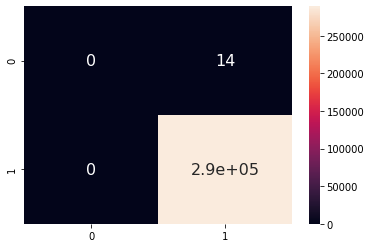

In [48]:
sn.heatmap(cum1, annot=True, annot_kws={"size": 16})

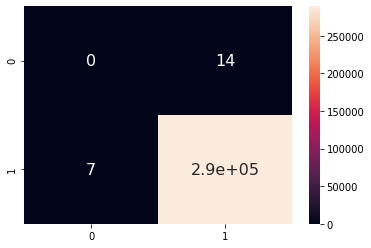

In [49]:
sn.heatmap(cum2, annot=True, annot_kws={"size": 16})

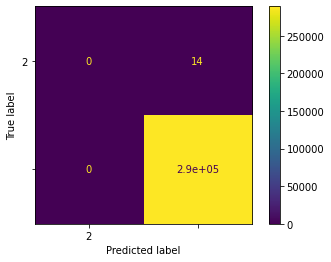

In [54]:
ConfusionMatrixDisplay(cum1 , display_labels=(2,)).plot()